In [1]:
import sqlite3
import pandas as pd

# function to query db and return a df with lowercase columns, in later steps
def get_df(query):
    connection = sqlite3.connect('database/hotel.db')
    df = pd.read_sql_query(query, connection)
    df.columns = df.columns.str.lower()
    connection.close()
    return df

# get all data from hotel table
connection = sqlite3.connect('database/hotel.db')
hotel_df = pd.read_sql_query('select * from hotel', connection)

# rename dataframe columns to lowercase. Pandas is case sensitive
hotel_df.columns = hotel_df.columns.str.lower()
print(hotel_df.columns)
hotel_df.head()

Index(['id', 'url', 'name', 'address', 'latitude', 'longitude', 'altitude',
       'description', 'rating', 'reviews', 'category_rank', 'star_rating',
       'nearby_restaurants', 'nearby_attractions', 'walkers_score', 'pictures',
       'average_night_price', 'price_range_min', 'price_range_max',
       'property_amenities', 'room_features', 'room_types', 'location_rating',
       'cleanliness_rating', 'service_rating', 'value_rating', 'also_known_as',
       'formerly_known_as', 'city_location', 'number_of_rooms',
       'reviews_summary', 'reviews_keypoint_location',
       'reviews_keypoint_atmosphere', 'reviews_keypoint_rooms',
       'reviews_keypoint_value', 'reviews_keypoint_cleanliness',
       'reviews_keypoint_service', 'reviews_keypoint_amenities',
       'reviews_5_excellent', 'reviews_4_very_good', 'reviews_3_average',
       'reviews_2_poor', 'reviews_1_terrible', 'reviews_keywords',
       'scraped_timestamp', 'insert_update_timestamp'],
      dtype='object')


,id,url,name,address,latitude,longitude,altitude,description,rating,reviews,...,reviews_keypoint_service,reviews_keypoint_amenities,reviews_5_excellent,reviews_4_very_good,reviews_3_average,reviews_2_poor,reviews_1_terrible,reviews_keywords,scraped_timestamp,insert_update_timestamp
0,267437109633874,https://www.tripadvisor.com/Hotel_Review-g1877...,Regia Goito,"Via Goito 17, Rome Italy",41.906067,12.500244,0.0,Looking for a place to stay in Rome? Then look...,1.5,20,...,NA,NA,1,0,3,3,13,NA,2024-03-18 10:58:51,2024-03-18 10:58:51
1,423388210168627,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Mazza,"Largo Ettore Marchiafava, 3, Rome Italy",41.907373,12.517269,0.0,NA,4.0,5,...,NA,NA,1,4,0,0,0,NA,2024-03-18 11:41:46,2024-03-18 11:41:46
2,454371077005232,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Casasuri,"Via Enrico Cialdini 13, 00185 Rome Italy",41.898488,12.503187,0.0,B&B Casasuri is an excellent choice for travel...,4.0,2,...,NA,NA,1,0,1,0,0,NA,2024-03-18 15:03:54,2024-03-18 15:03:54
3,492462491596955,https://www.tripadvisor.com/Hotel_Review-g1877...,Villa Faby B&B,"Via Leonida Lay, 195 Trigoria, Rome Italy",41.755265,12.472212,0.0,See why so many travelers make Villa Faby B&B ...,5.0,1,...,NA,NA,1,0,0,0,0,NA,2024-03-18 11:52:08,2024-03-18 11:52:08
4,842369030272705,https://www.tripadvisor.com/Hotel_Review-g1877...,President Gardens,"Via Rasella 148, 00187 Rome Italy",41.902439,12.487371,0.0,NA,4.0,6,...,NA,NA,4,0,0,1,1,NA,2024-03-18 12:51:50,2024-03-18 12:51:50


In [2]:
# from wordcloud import WordCloud, STOPWORDS

# def get_wordcloud(query, column):
#     """ Generate a word cloud based on the text data in the specified column of the query result """
#     # Get the data points from the database, using the provided query
#     df = get_df(query)

#     # Concatenate the text data from the specified column
#     text = ' '.join(df[column].dropna())

#     stopwords = []
#     stopwords = ['hotel', 'rome', 'stay', 'stayed', 'staff', 'B&B'] + list(STOPWORDS)

#     # Generate the word cloud
#     wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, font_path='./tt-milks-script-regular.ttf').generate(text)
#     return wordcloud

# # to do: change color, change mask, see other parameters
# # to do: save image to file, and then display it

In [3]:
query_positive_reviews = """
    select 
        r.text
    from 
        review r 
    where 
        r.language = 'en' 
        and r.rating > 3.5
    """

query_negative_reviews = """
    select
        r.text
    from
        review r
    where
        r.language = 'en'
        and r.rating < 2.5
    """

query_neutral_reviews = """
    select
        r.text
    from
        review r
    where
        r.language = 'en'
        and r.rating >= 2.5
        and r.rating <= 3.5
    """



# Generate word clouds for positive, negative, and neutral reviews
wordcloud_positive = get_wordcloud(query_positive_reviews, 'text')
wordcloud_negative = get_wordcloud(query_negative_reviews, 'text')
wordcloud_neutral = get_wordcloud(query_neutral_reviews, 'text')

Word cloud for positive reviews:


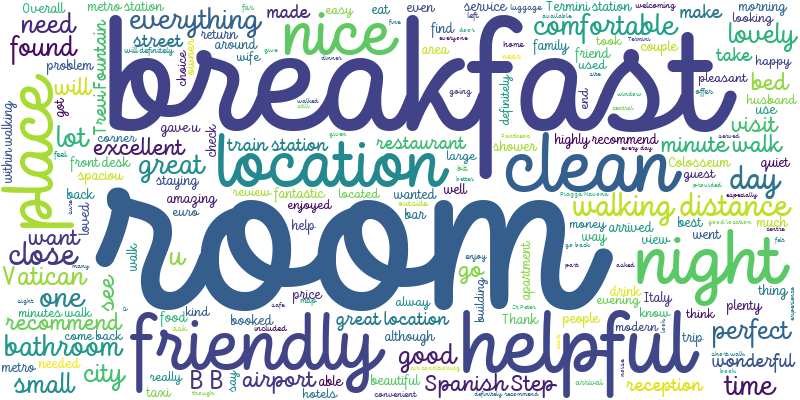

Word cloud for negative reviews:


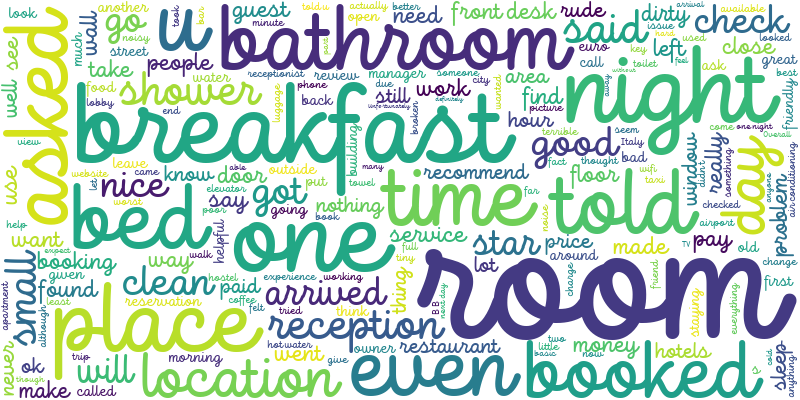

Word cloud for neutral reviews:


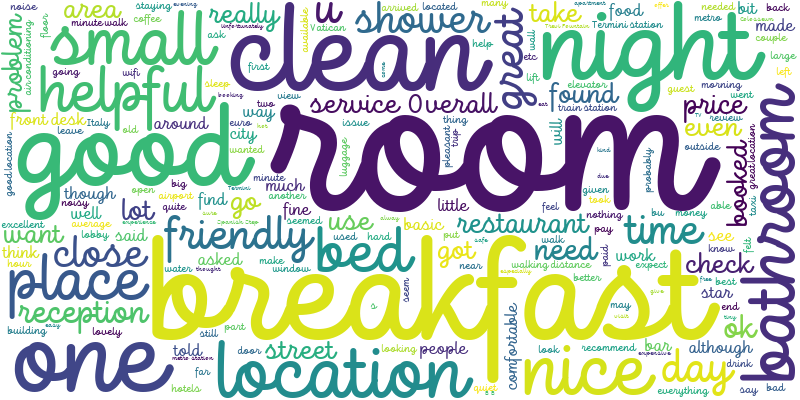

In [4]:
print('Word cloud for positive reviews:')
display(wordcloud_positive.to_image())
print('Word cloud for negative reviews:')
display(wordcloud_negative.to_image())
print('Word cloud for neutral reviews:')
display(wordcloud_neutral.to_image())

In [4]:
query = """
    select 
        mp.latitude, 
        mp.longitude, 
        r.hotel_id,
        r.id,
        r.language,
        r.title || '. ' || r.text as title_and_text,
        r.rating,
        r.month_of_review,
        r.year_of_review,
        r.likes,
        r.pics_flag,
        r.response_text != 'NA' and r.response_text is not null as response_flag
    from 
        review r
        left join hotel_mapquest_location mp on r.hotel_id = mp.hotel_id 
    where 
        -- Geocode conditions
        mp.rank = 0 -- Keep only the main location of the hotel
        and admin_area_4 = 'Rome' -- Remove few wrong geocoded hotels
        and mp.latitude is not null -- Remove non geocoded hotels (non reviewed hotels)
        and admin_area_5 = 'Rome' -- Restrict to hotels in Rome    
"""
df = get_df(query)

df.head()

,latitude,longitude,hotel_id,id,language,title_and_text,rating,month_of_review,year_of_review,likes,pics_flag,response_flag
0,41.90153,12.50542,593410961110347089,55952910247652360,pt,"perto da estação. bom local, limpo e preço hon...",3,11,2019,0,0,0
1,41.90153,12.50542,593410961110347089,158232763266082716,en,Not a good experience. We made a booking for 1...,1,10,2023,0,0,0
2,41.90153,12.50542,593410961110347089,695967302676261631,it,Pessimo. La camera era sporca (c’era tantissim...,1,1,2020,1,0,0
3,41.90153,12.50542,593410961110347089,899337448136098157,en,WORST EXPERIENCE EVER. DO NOT STAY HERE The pe...,1,10,2022,1,1,0
4,41.90719,12.48922,571677155464358671,1119396418969516,en,Fantastic Hotel in Rome. We have stayed at the...,5,10,2021,0,0,1


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']  # Using compound score as the overall sentiment score

In [6]:
df['sentiment_score'] = df['title_and_text'].apply(analyze_sentiment)

# # analyze only 100 reviews
# df2 = df.head(10000)
# df2['sentiment_score'] = df2['title_and_text'].apply(analyze_sentiment)

In [18]:
def classify_sentiment(score):
    if score > 0.5:
        return 'positive'
    elif score < -0.5:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

df['year_month'] = df['year_of_review'].astype(str) + '_' + df['month_of_review'].astype(str)

In [21]:
import random
# get 20 random reviews
df.sample(20, random_state=random.seed(42))

,latitude,longitude,hotel_id,id,language,title_and_text,rating,month_of_review,year_of_review,likes,pics_flag,response_flag,sentiment_score,sentiment,year_month
324560,41.90179,12.49486,545810853466026601,944254974639197341,fr,Très bel hôtel mais problèmes d'insonorisation...,3,5,2015,0,0,0,0.2732,neutral,2015_5
19689,41.90963,12.47466,537836845320272626,616782856194153873,en,Brilliant Location. We stayed at Hotel Anahi f...,4,4,2015,0,0,1,0.9856,positive,2015_4
7667,41.90531,12.48797,789730211029095128,931296415001771007,en,Great Location - European Syle Hotel - Interne...,5,10,2016,0,0,1,0.9867,positive,2016_10
84523,41.82530,12.39130,898084430416967542,143566138084951723,it,Manca qualcosa. Ho fatto un breve soggiorno in...,2,7,2017,0,0,1,0.5766,positive,2017_7
59093,41.90841,12.46492,389115067471480099,956939485890011753,en,Great value for a hotel in a great location in...,4,1,2018,6,0,0,0.9962,positive,2018_1
461415,41.89753,12.49521,246551026336296278,261363686249490855,fr,Hôtel très sympathique. Nous avons passé un bo...,4,11,2018,0,0,0,-0.5093,negative,2018_11
628391,41.90108,12.49798,710218881297218757,385188027022764638,es,La ubicación es muy buena y el hotel correcto....,4,3,2016,0,0,0,-0.7003,negative,2016_3
933268,41.89981,12.45253,826370028708126162,648148469083552427,it,tranquillo e accogliente!. Sono stata benissim...,5,9,2015,0,0,0,0.0000,neutral,2015_9
345458,41.89557,12.47291,595671653637383942,11906101586769288,en,"A wonderful place to stay, beautiful too!. I t...",4,3,2016,0,0,1,0.9953,positive,2016_3
759128,41.90513,12.50259,105585004700488126,956828826441880436,en,Best hotel in Rome. We were so impressed with ...,5,8,2016,0,0,0,0.9886,positive,2016_8


In [17]:
# get the averaage sentiment score for each year-month pair, for positive (score > 0.5), negative (score < -0.5) and neutral (score between -0.5 and 0.5) reviews. Only english reviews are considered
# query df in memory

# load the data
df2 = df.copy()

# filter out non-english reviews
df2 = df2[df.language == 'en']

print(df2.columns)

Index(['latitude', 'longitude', 'hotel_id', 'id', 'language', 'title_and_text',
       'rating', 'month_of_review', 'year_of_review', 'likes', 'pics_flag',
       'response_flag', 'sentiment_score'],
      dtype='object')


    year_month sentiment  count
0      2002_10  positive     13
1      2002_11  negative      1
2      2002_11   neutral      1
3      2002_11  positive     10
4      2002_12  negative      1
..         ...       ...    ...
781     2024_3  negative    176
782     2024_3   neutral    750
783     2024_3  positive   1172
784     2024_4   neutral      3
785     2024_4  positive      4

[786 rows x 3 columns]


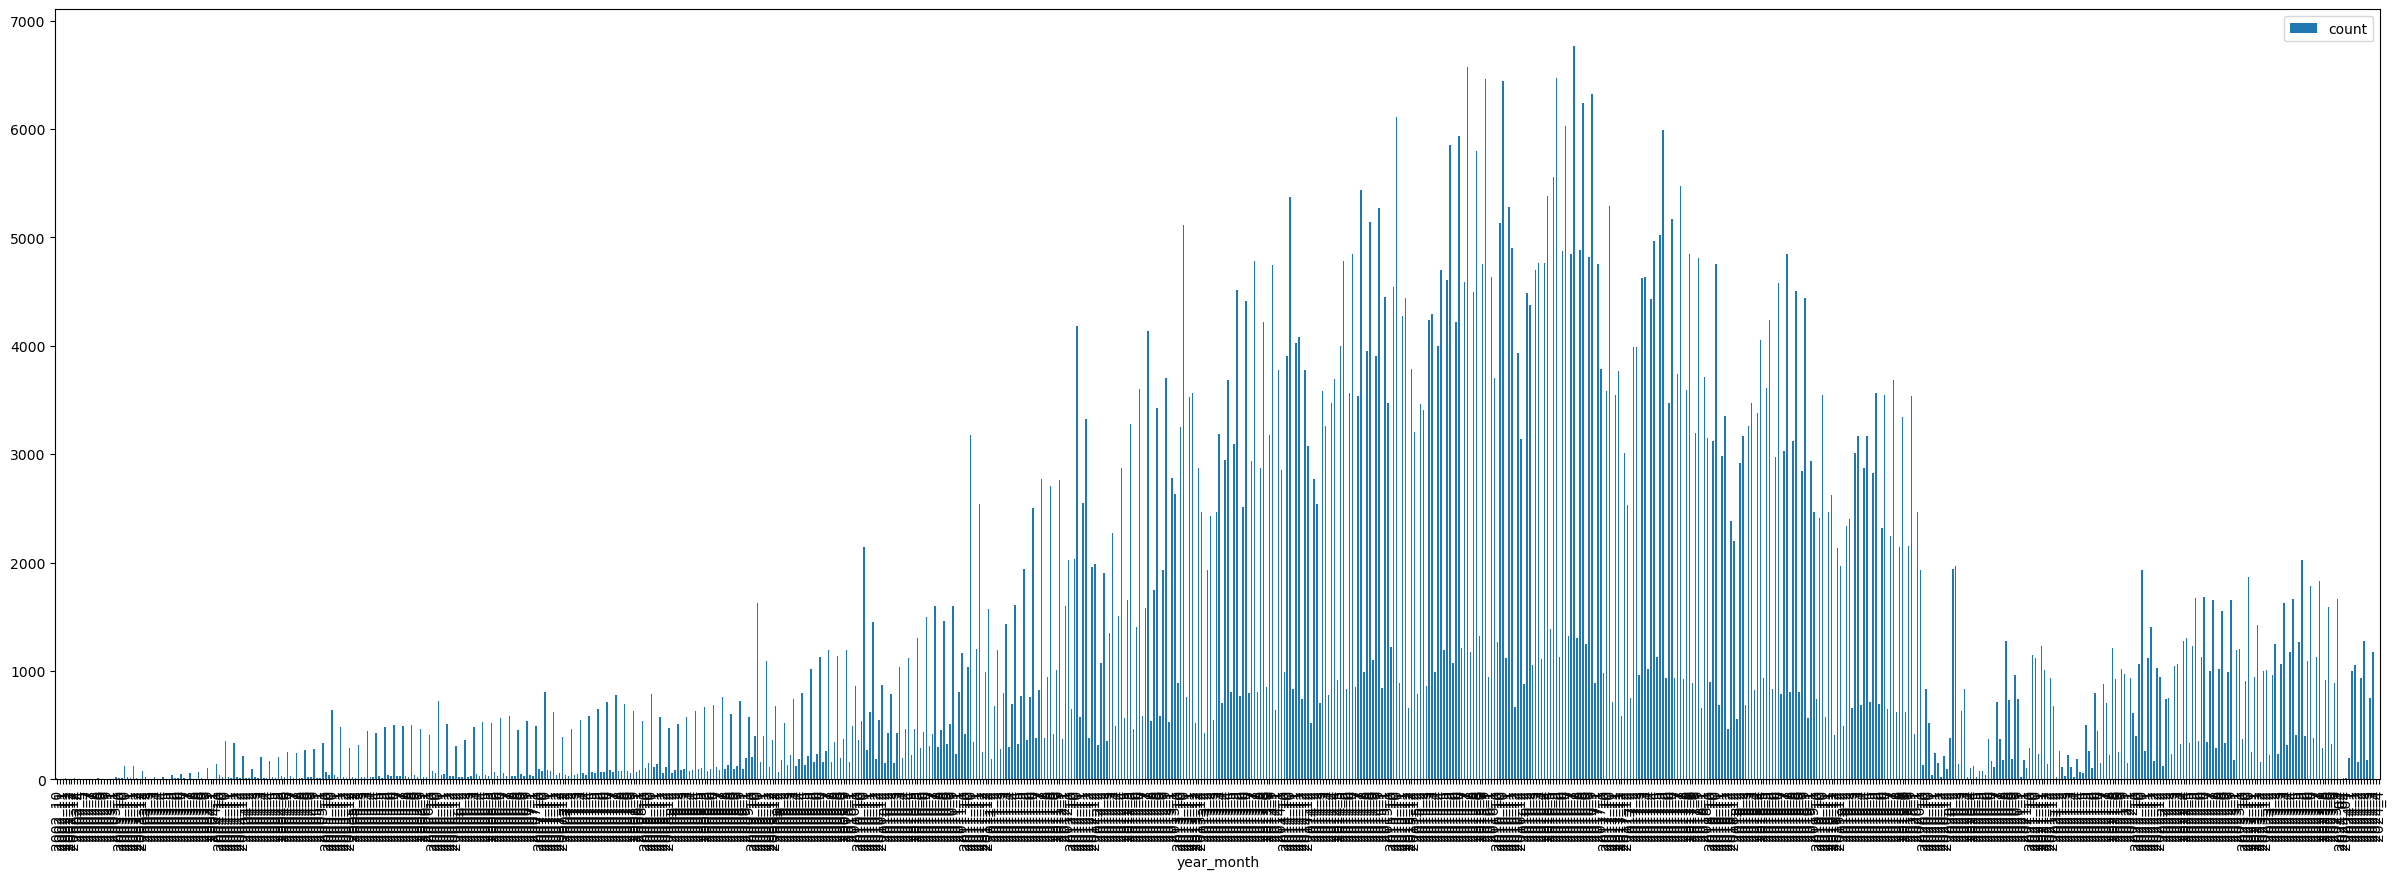

In [23]:
# Group by 'year_month' and 'sentiment', and calculate count of reviews
result_df = df.groupby(['year_month', 'sentiment']).size().reset_index(name='count')

plot = result_df.plot.bar(x='year_month', y='count', figsize=(30, 10))

# Display the resulting DataFrame
print(result_df)


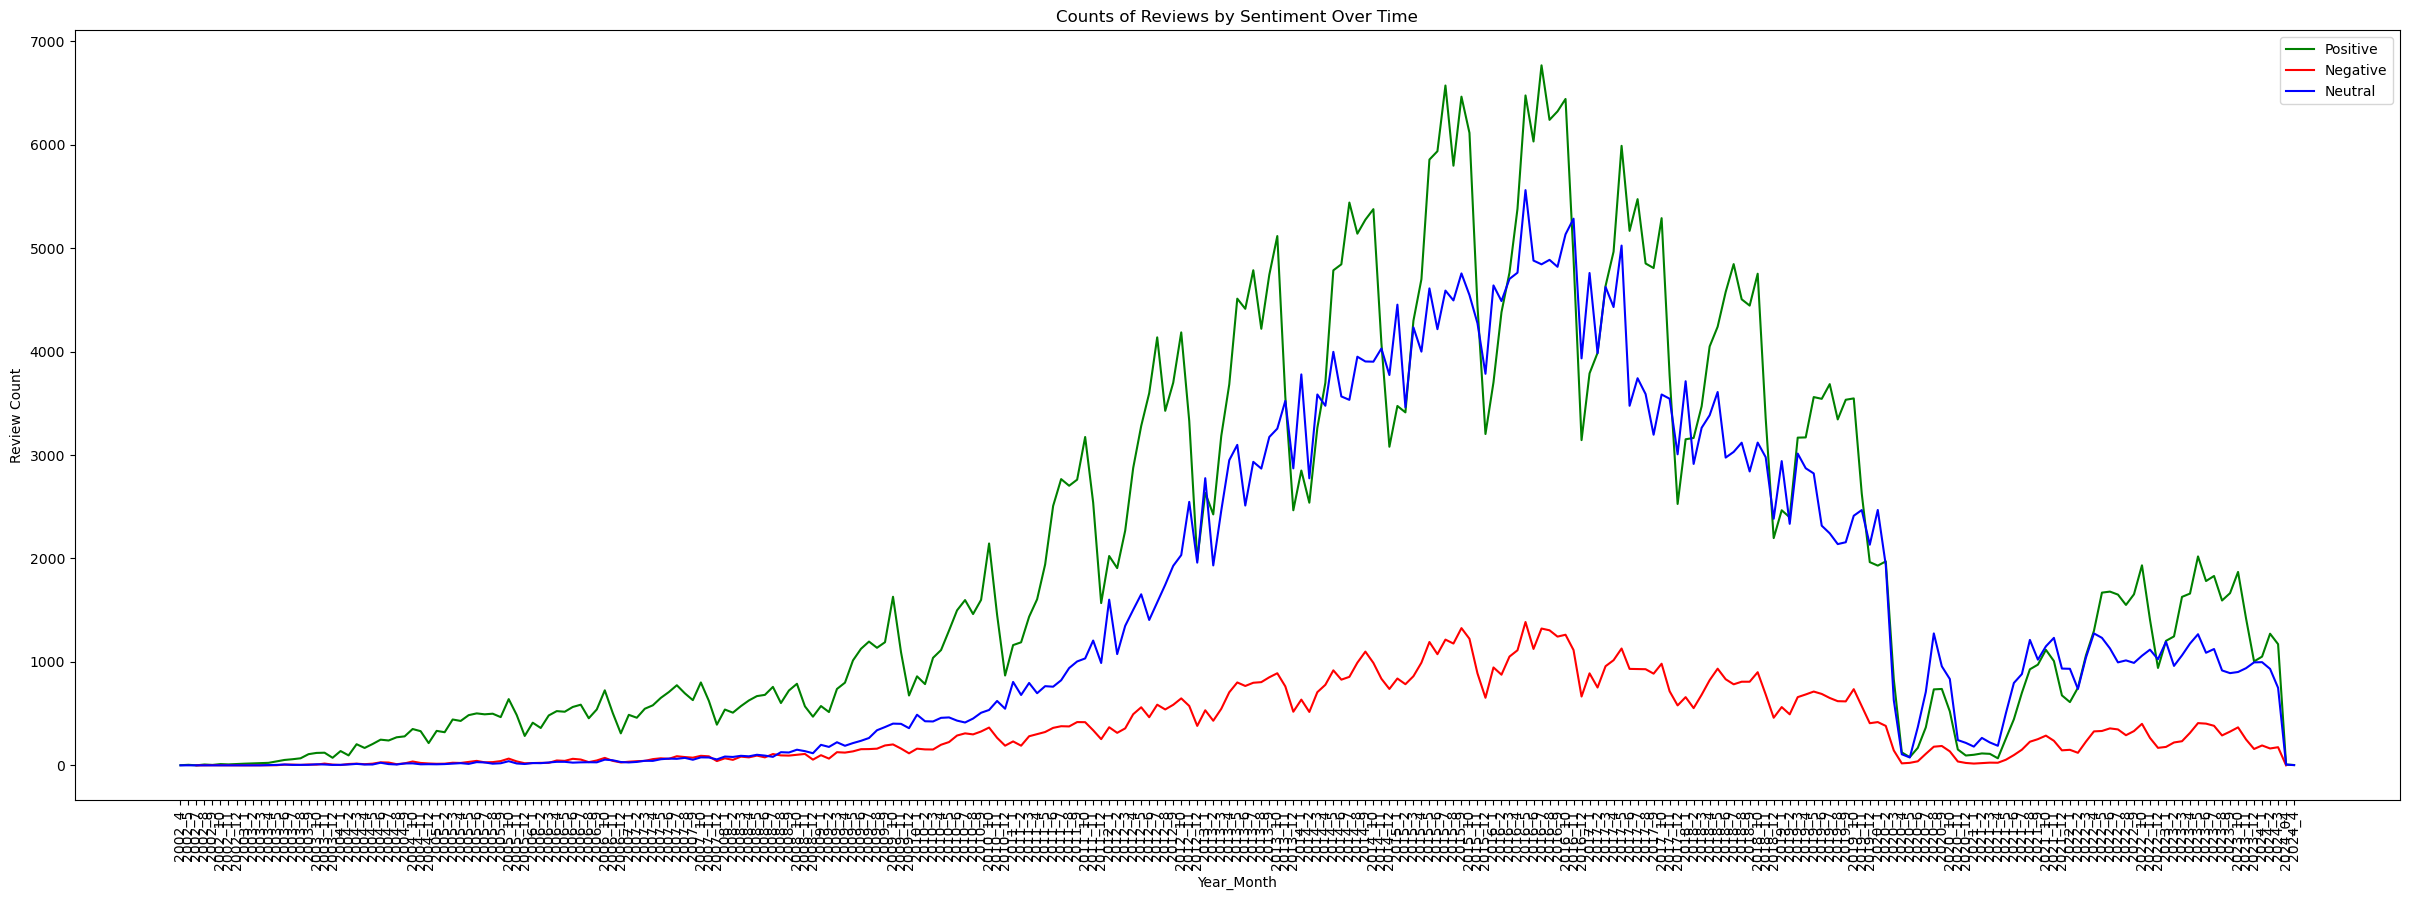

    year_month sentiment  count
7       2002_4   neutral      1
8       2002_4  positive      2
9       2002_5  positive      6
10      2002_7  negative      1
11      2002_7   neutral      1
..         ...       ...    ...
772    2024_04  negative      1
773    2024_04   neutral      8
774    2024_04  positive      9
784     2024_4   neutral      3
785     2024_4  positive      4

[786 rows x 3 columns]


In [47]:
import matplotlib.pyplot as plt

# Group by 'year_month', 'year_of_review', 'month_of_review', and 'sentiment', and calculate count of reviews
result_df = df.groupby(['year_month', 'year_of_review', 'month_of_review', 'sentiment']).size().reset_index(name='count')

# Convert 'year_of_review' and 'month_of_review' columns to integers
result_df['year_of_review'] = result_df['year_of_review'].astype(int)
result_df['month_of_review'] = result_df['month_of_review'].astype(int)

# Sort the DataFrame by 'year_of_review' and 'month_of_review'
result_df = result_df.sort_values(by=['year_of_review', 'month_of_review'])

# drop year_of_review and month_of_review columns
result_df = result_df.drop(columns=['year_of_review', 'month_of_review'])

# Filter the DataFrame for each sentiment
positive_df = result_df[result_df['sentiment'] == 'positive']
negative_df = result_df[result_df['sentiment'] == 'negative']
neutral_df = result_df[result_df['sentiment'] == 'neutral']

# Plot the bar chart with three sentiment lines of different colors
plt.figure(figsize=(30, 10))
plt.plot(positive_df['year_month'], positive_df['count'], label='Positive', color='green')
plt.plot(negative_df['year_month'], negative_df['count'], label='Negative', color='red')
plt.plot(neutral_df['year_month'], neutral_df['count'], label='Neutral', color='blue')

# Customize the plot
plt.title('Counts of Reviews by Sentiment Over Time')
plt.xlabel('Year_Month')
plt.ylabel('Review Count')
plt.legend()

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Display the resulting DataFrame
print(result_df)


In [120]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import random


def random_color_func(word, font_size, position, orientation, random_state=None, colors=None,**kwargs):
    rome_colors = [
        "#B03A2E",  # Roman Red
        "#E07B39",  # Terracotta
        "#CC7722",  # Ochre
        "#F4A460",  # Tuscan Yellow
        "#D2B48C",  # Sandstone Beige
        "#D4AF37",  # Vatican Gold
        "#A71E22",  # Rosso Pompeiano
        "#FF6347",  # Tomato Red
        "#FF7F50",  # Coral
        "#FFA500",   # Orange
        "#708090",  # Slate Gray
    ]
    shades_of_purple = [
        "#F5E1FF",  # Lavender
        "#DAC3FF",  # Lilac
        "#C3A3FF",  # Periwinkle
        "#AD85FF",  # Amethyst
        "#9766FF",  # Purple Heart
        "#8047FF",  # Medium Purple
        "#6B29FF",  # Deep Lilac
        "#5500FF",  # Dark Violet
        "#4400CC",  # Indigo
        "#330099"   # Dark Purple
    ]
    shades_of_green = [
        "#E6FFE6",  # Light Green
        "#C3FFC3",  # Pale Green
        "#9AFF9A",  # Mint Green
        "#70DB70",  # Spring Green
        "#4EEE94",  # Sea Green
        "#32CD32",  # Lime Green
        "#228B22",  # Forest Green
        "#1C8C19",  # Dark Green
        "#136207",  # Deep Green
        "#004D00"   # Hunter Green
    ]
    return random.choice(rome_colors)


def get_wordcloud(df, column, stop_common_words=False, mask=None, colors=None):
    """ Generate a word cloud based on the text data in the specified column of the query result """

    # Concatenate the text data from the specified column
    text = ' '.join(df[column].dropna())

    # These are words common to both positive and negative reviews, to be removed only when analyzing positive or negative reviews
    common_words = [ 
        'rome', 
        'staff', 
        'room',
        'rooms',
        'breakfast',
    ]
    # These are additional stopwords, to be removed always
    added_stopwords = [
        'hotel', 
        'rome', 
        'stay', 
        'stayed', 
        'B&B',
        'one',
    ] 

    if mask is not None:
        mask = np.array(Image.open(mask))

    
    stopwords = (common_words if stop_common_words is True else []) + added_stopwords + list(STOPWORDS)

    # Generate the word cloud
    wordcloud = WordCloud(
        # width=800, # default is 400
        # height=400, # default is 200
        background_color='white', 
        stopwords=stopwords, 
        mask=mask,
        # min_font_size=2, # default is 4
        max_words=600, # default is 200
        max_font_size=100, # default is None
        font_path='./tt-milks-script-regular.ttf',
        color_func=random_color_func
    ).generate(text)
    return wordcloud

# to do: change color, change mask, see other parameters
# to do: save image to file, and then display it

In [73]:
# get generale df. Also exclude missing data rows
df_all = df[(df.rating != '') & (df.language == 'en')]

# select reviews in english with rating 3 or higher and positive sentiment
df_positive = df_all[(df_all.rating.astype(int) >= 3) & (df_all.sentiment == 'positive')]

# select reviews in english with rating 3 or lower and negative sentiment
df_negative = df_all[(df_all.rating.astype(int) <= 3) & (df_all.sentiment == 'negative')]

In [107]:
# Generate word clouds for positive, negative, and neutral reviews
wordcloud_all = get_wordcloud(df_all, 'title_and_text', stop_common_words=False, mask='colosseum_mask_crop_full.jpg')

In [116]:
wordcloud_positive = get_wordcloud(df_positive, 'title_and_text', stop_common_words=True, mask='thumbsup.jpg')

In [121]:
wordcloud_negative = get_wordcloud(df_negative, 'title_and_text', stop_common_words=True, mask='thumbsdown.jpg')

Word cloud for all reviews:


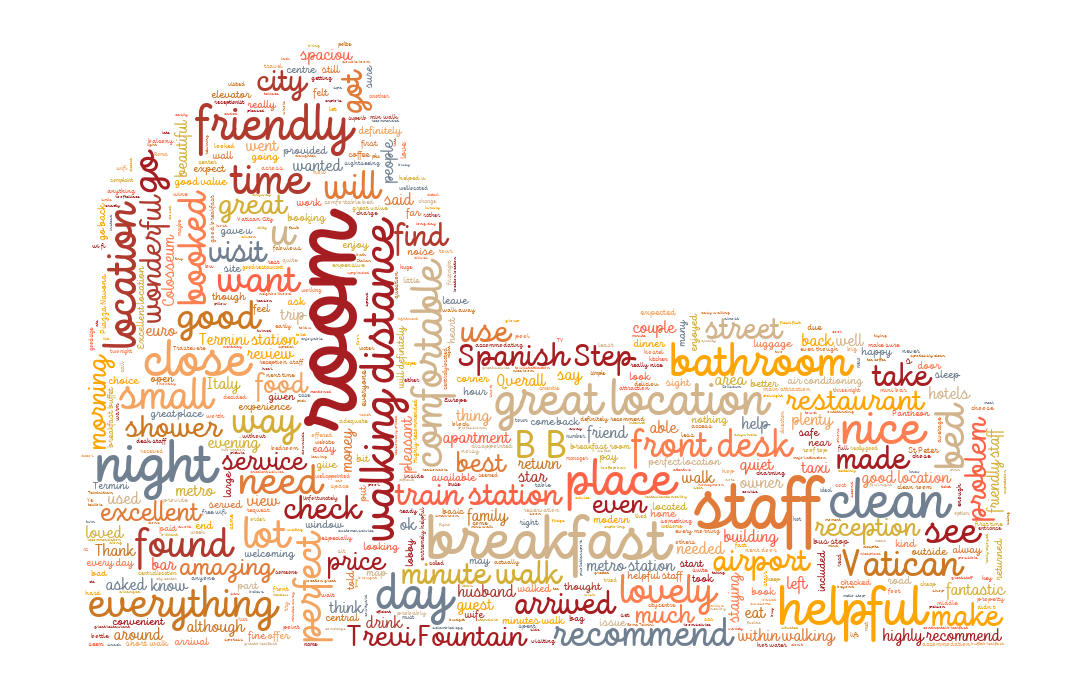

Word cloud for positive reviews:


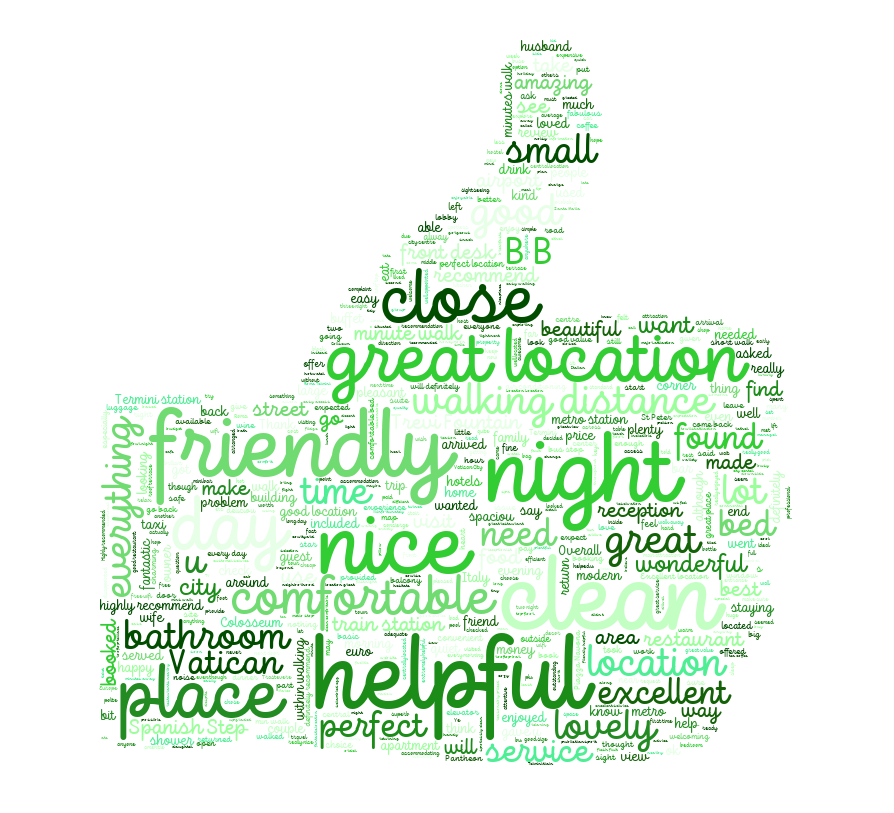

Word cloud for negative reviews:


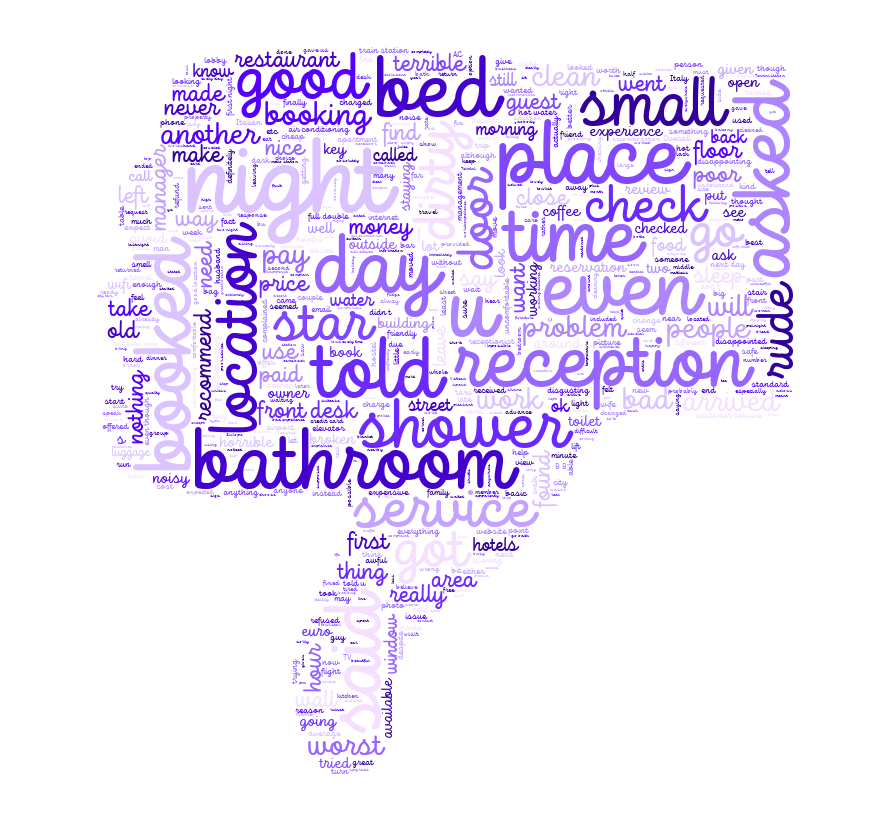

In [122]:
print('Word cloud for all reviews:')
display(wordcloud_all.to_image())
print('Word cloud for positive reviews:')
display(wordcloud_positive.to_image())
print('Word cloud for negative reviews:')
display(wordcloud_negative.to_image())

# make them denser

In [5]:
connection.close()
wordcloud_negative = None
wordcloud_positive = None
wordcloud_neutral = None
stopwords = None
df = None
hotel_df = None